<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto</font></h1>

## Introduction

In this lab, I'm going to solve the Lab: Segmenting and Clustering Neighborhoods in Toronto that is part of the Week 3 in the Data Science Capstone Course.

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib

import pandas as pd
import numpy as np
import html5lib
import requests
from bs4 import BeautifulSoup


     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 5.3MB/s eta 0:00:01


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_raw = pd.read_html(url)
df_raw[0]

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Converting the table extracted into Data Frame.

In [3]:
neighborhoods = pd.DataFrame(df_raw[0])
neighborhoods

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


## Answer Question 1

Eliminating 'Districts' with the value 'Not assigned'.

In [4]:
neighborhoods = neighborhoods[neighborhoods.Borough	 != 'Not assigned']
neighborhoods

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Looking for unique values in 'Neighbourhood' Column.

In [5]:
neighborhoods['Neighbourhood'].unique()

array(['Parkwoods', 'Victoria Village', 'Regent Park, Harbourfront',
       'Lawrence Manor, Lawrence Heights',
       "Queen's Park, Ontario Provincial Government",
       'Islington Avenue, Humber Valley Village', 'Malvern, Rouge',
       'Don Mills', 'Parkview Hill, Woodbine Gardens',
       'Garden District, Ryerson', 'Glencairn',
       'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale',
       'Rouge Hill, Port Union, Highland Creek', 'Woodbine Heights',
       'St. James Town', 'Humewood-Cedarvale',
       'Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood',
       'Guildwood, Morningside, West Hill', 'The Beaches', 'Berczy Park',
       'Caledonia-Fairbanks', 'Woburn', 'Leaside', 'Central Bay Street',
       'Christie', 'Cedarbrae', 'Hillcrest Village',
       'Bathurst Manor, Wilson Heights, Downsview North',
       'Thorncliffe Park', 'Richmond, Adelaide, King',
       'Dufferin, Dovercourt Village', 'Scarborough Village',
       'Fairview, H

Looking one more time for rows in the Column 'Neighbourhood' with the value 'Not assigned'.

In [6]:
neighborhoods.loc[neighborhoods['Neighbourhood'] == 'Not assigned']

,Postal Code,Borough,Neighbourhood


Getting the 'shape' of the table. 

In [7]:
neighborhoods.shape

(103, 3)

Getting the latitude and the longitude coordinates of each neighborhood.

In [8]:
postal_code = neighborhoods['Postal Code']
postal_code = pd.DataFrame(postal_code)
postal_code

,Postal Code
2,M3A
3,M4A
4,M5A
5,M6A
6,M7A
...,...
160,M8X
165,M4Y
168,M7Y
169,M8Y


In [ ]:
#!pip install geocoder
#import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

Using the csv file provided by the course instructors to find the longitude and latitude of each Postal Code.

In [9]:
!wget -q -O 'toronto_neighborhoods_locations.csv' http://cocl.us/Geospatial_data
toronto_locations = pd.read_csv('toronto_neighborhoods_locations.csv')
toronto_locations.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Answer Question 2

Merging the both tables: the table that contains the neighborhoods and the one who has the location data.

In [10]:
neighborhoods_locations = pd.merge(left=neighborhoods, right=toronto_locations, left_on='Postal Code', right_on='Postal Code')
neighborhoods_locations

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Clustering Toronto Neighborhoods.

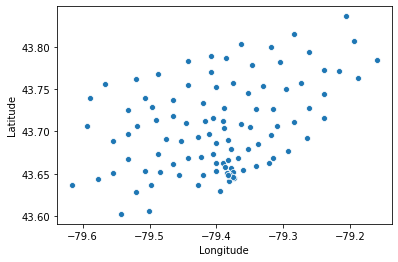

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(neighborhoods_locations['Longitude'], neighborhoods_locations['Latitude'])
sns.scatterplot(neighborhoods_locations['Longitude'], neighborhoods_locations['Latitude'], data=neighborhoods_locations)
plt.show()

In [12]:
neighborhoods = neighborhoods_locations
neighborhoods = neighborhoods_locations.drop('Postal Code',1)
neighborhoods = neighborhoods.rename(columns={'Neighbourhood': 'Neighborhood'})
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [14]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto City, Ontario'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [15]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Downtonwn Toronto. So let's slice the original dataframe and create a new dataframe of the DT data.

In [16]:
DownT_data = neighborhoods[neighborhoods['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
DownT_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Downtown Toronto,St. James Town,43.651494,-79.375418
4,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [17]:
DownT_data

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Downtown Toronto,St. James Town,43.651494,-79.375418
4,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,Downtown Toronto,Christie,43.669542,-79.422564
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


As you can see, reading all table we can see different neighborhoods into the same Borough, not bad, but we need the location for each one, then we have to split them: 

In [18]:
DownT_data_Worked = DownT_data.assign(Neighborhood=DownT_data['Neighborhood'].str.split(',')).explode('Neighborhood')
DownT_data_Worked

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Regent Park,43.654260,-79.360636
0,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,Downtown Toronto,Queen's Park,43.662301,-79.389494
1,Downtown Toronto,Ontario Provincial Government,43.662301,-79.389494
2,Downtown Toronto,Garden District,43.657162,-79.378937
2,Downtown Toronto,Ryerson,43.657162,-79.378937
3,Downtown Toronto,St. James Town,43.651494,-79.375418
4,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,Downtown Toronto,Christie,43.669542,-79.422564


After split the original table we have got the same locations for different neighborhoods, then we need to look for the correct ones. We have the correct data into the next lines, let's get it:

In [19]:
Dtdata = {'Borough':  ['Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto','Downtown Toronto'],
        'Neighborhood': ['Regent Park','Harbourfront',"Queen's Park",'Ontario Provincial Government','Garden District','Ryerson','St. James Town','Berczy Park','Central Bay Street','Christie','Richmond','Adelaide','King','Harbourfront East','Union Station','Toronto Islands','Toronto Dominion Centre','Design Exchange','Commerce Court','Victoria Hotel','University of Toronto','Harbord','Kensington Market','Chinatown','Grange Park','CN Tower','King and Spadina','Railway Lands','Harbourfront West','Bathurst Quay','South Niagara','Island airport','Rosedale','Stn A PO Boxes','Cabbagetown','First Canadian Place','Underground city','Church and Wellesley', 'Corktown','Cabbagetown South'],
        'Latitude': ['43.659771','43.639001','43.664534','43.658156','43.657939','43.657519','43.669989','43.648116','43.657275','43.669542','43.647312','43.646693','43.642068','43.638749','43.64541','43.620848','43.6476139','43.6476981','43.648424','43.6480937','43.6629239','43.661167','43.65471','43.652846','43.654602','43.6426251','43.6454917','43.6451261','43.637804','43.635966','43.636856','43.630507','43.6809896','43.646435','43.6643958','43.6488945','43.648439','43.665473','43.654225','43.657306'],
        'Longitude': ['-79.361558','-79.385937','-79.392379','-79.386391','-79.376109','-79.378812','-79.373136','-79.374921','-79.384343','-79.422564','-79.399637','-79.391697','-79.41174','-79.381836','-79.380808','-79.38062','-79.384343','-79.3825166','-79.378719','-79.3792656','-79.397534','-79.404254','-79.402425','-79.39828','-79.393149','-79.389215','-79.3970839','-79.390514','-79.391765','-79.397378','-79.408751','-79.398431','-79.3827261','-79.374846','-79.3745184','-79.3830613','-79.380171','-79.380849','-79.360176','-79.367800'],
        }

downtown_data = pd.DataFrame (Dtdata, columns = ['Borough','Neighborhood','Latitude','Longitude'])
downtown_data['Latitude'] = pd.to_numeric(downtown_data['Latitude'])
downtown_data['Longitude'] = pd.to_numeric(downtown_data['Longitude'])
downtown_data

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Regent Park,43.659771,-79.361558
1,Downtown Toronto,Harbourfront,43.639001,-79.385937
2,Downtown Toronto,Queen's Park,43.664534,-79.392379
3,Downtown Toronto,Ontario Provincial Government,43.658156,-79.386391
4,Downtown Toronto,Garden District,43.657939,-79.376109
5,Downtown Toronto,Ryerson,43.657519,-79.378812
6,Downtown Toronto,St. James Town,43.669989,-79.373136
7,Downtown Toronto,Berczy Park,43.648116,-79.374921
8,Downtown Toronto,Central Bay Street,43.657275,-79.384343
9,Downtown Toronto,Christie,43.669542,-79.422564


Let's get the geographical coordinates of Downtown Toronto.

In [20]:
address = 'Downtown Toronto, Toronto'

geolocator = Nominatim(user_agent="dt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


As we did with all of Toronto City, let's visualize in Downtown Toronto the neighborhoods on it.

In [21]:
# create map of Manhattan using latitude and longitude values
map_downtown_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown_toronto)  
    
map_downtown_toronto

#### Define Foursquare Credentials and Version

In [22]:
CLIENT_ID = '2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU' # your Foursquare ID
CLIENT_SECRET = 'OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2E0HFCQ0UA0YLCFJF4JON3V40KXFQD4FAI2DYCWIRX4L04QU
CLIENT_SECRET:OPDP1W5CP4WSL35KLARVZGJYG3JNHBVED4ETX1WIUVSVBPMF


## Explore Neighborhoods in Downtown Toronto

#### Let's create a function to get the venues to all the neighborhoods in Downtown Toronto.

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Downtown_venues*.

In [24]:
# type your answer here

downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )


Regent Park
Harbourfront
Queen's Park
Ontario Provincial Government
Garden District
Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond
Adelaide
King
Harbourfront East
Union Station
Toronto Islands
Toronto Dominion Centre
Design Exchange
Commerce Court
Victoria Hotel
University of Toronto
Harbord
Kensington Market
Chinatown
Grange Park
CN Tower
King and Spadina
Railway Lands
Harbourfront West
Bathurst Quay
South Niagara
Island airport
Rosedale
Stn A PO Boxes
Cabbagetown
First Canadian Place
Underground city
Church and Wellesley
Corktown
Cabbagetown South


#### Let's check the size of the resulting dataframe

In [25]:
print(downtown_venues.shape)
downtown_venues.head()

(2659, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.659771,-79.361558,Regent Park Aquatic Centre,43.660600,-79.361392,Pool
1,Regent Park,43.659771,-79.361558,Daniels Spectrum,43.660137,-79.361808,Performing Arts Venue
2,Regent Park,43.659771,-79.361558,Sumach Espresso,43.658135,-79.359515,Coffee Shop
3,Regent Park,43.659771,-79.361558,Sukhothai,43.658444,-79.365681,Thai Restaurant
4,Regent Park,43.659771,-79.361558,Paintbox Bistro,43.660050,-79.362855,Restaurant


### Let's realize than the Dowtown Toronto has 2646 venues and Manhattan has 3181!

Let's check how many venues were returned for each neighborhood

In [26]:
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,100,100,100,100,100,100
Bathurst Quay,27,27,27,27,27,27
Berczy Park,100,100,100,100,100,100
CN Tower,64,64,64,64,64,64
Cabbagetown,59,59,59,59,59,59
Cabbagetown South,32,32,32,32,32,32
Central Bay Street,86,86,86,86,86,86
Chinatown,71,71,71,71,71,71
Christie,18,18,18,18,18,18


#### Let's find out how many unique categories can be curated from all the returned venues

In [27]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 255 uniques categories.


Let's realize (again) there are only 255 unique cateogries in comparison with Manhattan.

## Analyze Each Neighborhood

In [28]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [29]:
downtown_onehot.shape

(2659, 255)

There is a mistake, should be 256 columns, and are only 255.
The first column is not Neighborhoods.
We have to make an adicional check.

In [30]:
if 'Neighborhood' in downtown_onehot.columns:
    print('yes')
else:
    print('no')

yes


In [31]:
downtown_onehot['Neighborhood']

0             Regent Park
1             Regent Park
2             Regent Park
3             Regent Park
4             Regent Park
              ...        
2654    Cabbagetown South
2655    Cabbagetown South
2656    Cabbagetown South
2657    Cabbagetown South
2658    Cabbagetown South
Name: Neighborhood, Length: 2659, dtype: object

In [32]:
downtown_venues.loc[downtown_venues['Venue Category']=='Neighborhood']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
43,Harbourfront,43.639001,-79.385937,Harbourfront,43.639526,-79.380688,Neighborhood
567,Central Bay Street,43.657275,-79.384343,Downtown Toronto,43.653232,-79.385296,Neighborhood
913,Harbourfront East,43.638749,-79.381836,Harbourfront,43.639526,-79.380688,Neighborhood


In [33]:
downtown_venues.drop(downtown_venues[downtown_venues['Venue Category']=='Neighborhood'].index, inplace=True)

In [34]:
print(downtown_venues.shape)
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))
print("We have erased the Venue Categories with the name 'Neighborhood', let's do the same job again")

(2656, 7)
There are 254 uniques categories.
We have erased the Venue Categories with the name 'Neighborhood', let's do the same job again


In [35]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Regent Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regent Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Regent Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Regent Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Regent Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
pd.set_option('max_columns', None)
downtown_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Street Art,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Regent Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [37]:
downtown_onehot.shape

(2656, 255)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [38]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Street Art,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Adelaide,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000

#### Let's confirm the new size

In [39]:
downtown_grouped.shape

(40, 255)

#### Let's print each neighborhood along with the top 5 most common venues

In [40]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                venue  freq
0         Coffee Shop  0.07
1               Hotel  0.05
2     Thai Restaurant  0.03
3  Italian Restaurant  0.03
4              Lounge  0.03


----Bathurst Quay----
              venue  freq
0       Coffee Shop  0.19
1              Park  0.07
2              Café  0.07
3  Ramen Restaurant  0.04
4   Harbor / Marina  0.04


----Berczy Park----
                venue  freq
0         Coffee Shop  0.08
1                Café  0.06
2               Hotel  0.04
3          Restaurant  0.04
4  Italian Restaurant  0.04


----CN Tower----
              venue  freq
0             Hotel  0.08
1       Pizza Place  0.06
2       Coffee Shop  0.06
3               Gym  0.05
4  Baseball Stadium  0.05


----Cabbagetown----
                 venue  freq
0          Coffee Shop  0.10
1              Gay Bar  0.08
2  Japanese Restaurant  0.05
3          Pizza Place  0.03
4                  Pub  0.03


----Cabbagetown South----
                   venue  freq
0         Sandw

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Hotel,Restaurant,Bar,Lounge,Italian Restaurant,Thai Restaurant,Bookstore,Sushi Restaurant,Event Space
1,Bathurst Quay,Coffee Shop,Café,Park,Ramen Restaurant,Sculpture Garden,Diner,Restaurant,Bank,Garden,Japanese Restaurant
2,Berczy Park,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Pub,Gastropub,Beer Bar
3,CN Tower,Hotel,Pizza Place,Coffee Shop,Aquarium,Baseball Stadium,Bar,Gym,Café,Restaurant,Park
4,Cabbagetown,Coffee Shop,Gay Bar,Japanese Restaurant,Gastropub,Pub,Liquor Store,Pizza Place,Diner,Butcher,Sculpture Garden


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [43]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 1, 1, 3, 3, 3, 1, 1, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Regent Park,43.659771,-79.361558,3,Coffee Shop,Thai Restaurant,Electronics Store,Park,Food Truck,Beer Store,Restaurant,Auto Dealership,Pub,Indian Restaurant
1,Downtown Toronto,Harbourfront,43.639001,-79.385937,1,Coffee Shop,Aquarium,Gym,Scenic Lookout,Pizza Place,Boat or Ferry,Brewery,Bar,Baseball Stadium,Café
2,Downtown Toronto,Queen's Park,43.664534,-79.392379,3,Coffee Shop,Sushi Restaurant,Café,Park,Sandwich Place,Persian Restaurant,Clothing Store,Museum,Sports Bar,Burger Joint
3,Downtown Toronto,Ontario Provincial Government,43.658156,-79.386391,3,Coffee Shop,Sandwich Place,Italian Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Café,Thai Restaurant,Juice Bar,Park
4,Downtown Toronto,Garden District,43.657939,-79.376109,3,Coffee Shop,Sandwich Place,Hotel,Middle Eastern Restaurant,Restaurant,Café,Movie Theater,Pizza Place,Japanese Restaurant,Diner


Finally, let's visualize the resulting clusters

In [45]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
downtown_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Regent Park,43.659771,-79.361558,3,Coffee Shop,Thai Restaurant,Electronics Store,Park,Food Truck,Beer Store,Restaurant,Auto Dealership,Pub,Indian Restaurant
1,Downtown Toronto,Harbourfront,43.639001,-79.385937,1,Coffee Shop,Aquarium,Gym,Scenic Lookout,Pizza Place,Boat or Ferry,Brewery,Bar,Baseball Stadium,Café
2,Downtown Toronto,Queen's Park,43.664534,-79.392379,3,Coffee Shop,Sushi Restaurant,Café,Park,Sandwich Place,Persian Restaurant,Clothing Store,Museum,Sports Bar,Burger Joint
3,Downtown Toronto,Ontario Provincial Government,43.658156,-79.386391,3,Coffee Shop,Sandwich Place,Italian Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Café,Thai Restaurant,Juice Bar,Park
4,Downtown Toronto,Garden District,43.657939,-79.376109,3,Coffee Shop,Sandwich Place,Hotel,Middle Eastern Restaurant,Restaurant,Café,Movie Theater,Pizza Place,Japanese Restaurant,Diner
5,Downtown Toronto,Ryerson,43.657519,-79.378812,3,Coffee Shop,Clothing Store,Ramen Restaurant,Japanese Restaurant,Café,Cosmetics Shop,Pizza Place,Burger Joint,Theater,Lingerie Store
6,Downtown Toronto,St. James Town,43.669989,-79.373136,3,Coffee Shop,Pizza Place,Grocery Store,Café,Indian Restaurant,Breakfast Spot,Bar,Library,Bike Rental / Bike Share,Bistro
7,Downtown Toronto,Berczy Park,43.648116,-79.374921,1,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Pub,Gastropub,Beer Bar
8,Downtown Toronto,Central Bay Street,43.657275,-79.384343,3,Coffee Shop,Sandwich Place,Clothing Store,Italian Restaurant,Diner,Sushi Restaurant,Movie Theater,Bubble Tea Shop,Burger Joint,Middle Eastern Restaurant
9,Downtown Toronto,Christie,43.669542,-79.422564,1,Grocery Store,Café,Park,Bank,Baby Store,Candy Store,Athletics & Sports,Restaurant,Italian Restaurant,Coffee Shop


## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [47]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,South Niagara,Park,Gym,Pizza Place,Bar,Bus Stop,Arts & Crafts Store,Trail,Coffee Shop,Café,Historic Site


#### Cluster 2

In [48]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Harbourfront,Coffee Shop,Aquarium,Gym,Scenic Lookout,Pizza Place,Boat or Ferry,Brewery,Bar,Baseball Stadium,Café
7,Berczy Park,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Italian Restaurant,Bakery,Pub,Gastropub,Beer Bar
9,Christie,Grocery Store,Café,Park,Bank,Baby Store,Candy Store,Athletics & Sports,Restaurant,Italian Restaurant,Coffee Shop
10,Richmond,Coffee Shop,Furniture / Home Store,Italian Restaurant,Spa,Sandwich Place,Restaurant,French Restaurant,Asian Restaurant,Gym,Yoga Studio
11,Adelaide,Coffee Shop,Hotel,Restaurant,Bar,Lounge,Italian Restaurant,Thai Restaurant,Bookstore,Sushi Restaurant,Event Space
12,King,Coffee Shop,Restaurant,Park,Mexican Restaurant,Intersection,Bakery,Pet Store,Café,Men's Store,Women's Store
17,Design Exchange,Coffee Shop,Café,Hotel,Asian Restaurant,Gastropub,Italian Restaurant,Seafood Restaurant,American Restaurant,Japanese Restaurant,Restaurant
18,Commerce Court,Coffee Shop,Restaurant,Hotel,Café,Gym,Beer Bar,Japanese Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant
19,Victoria Hotel,Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Japanese Restaurant,Seafood Restaurant,Deli / Bodega,Beer Bar
20,University of Toronto,Café,Bookstore,Park,Yoga Studio,Italian Restaurant,Mediterranean Restaurant,Noodle House,French Restaurant,Sandwich Place,Bank


#### Cluster 3

In [49]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Rosedale,Pool,Playground,Athletics & Sports,Tennis Court,Yoga Studio,Donut Shop,Distribution Center,Dive Bar,Dog Run,Doner Restaurant


#### Cluster 4

In [50]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Regent Park,Coffee Shop,Thai Restaurant,Electronics Store,Park,Food Truck,Beer Store,Restaurant,Auto Dealership,Pub,Indian Restaurant
2,Queen's Park,Coffee Shop,Sushi Restaurant,Café,Park,Sandwich Place,Persian Restaurant,Clothing Store,Museum,Sports Bar,Burger Joint
3,Ontario Provincial Government,Coffee Shop,Sandwich Place,Italian Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Café,Thai Restaurant,Juice Bar,Park
4,Garden District,Coffee Shop,Sandwich Place,Hotel,Middle Eastern Restaurant,Restaurant,Café,Movie Theater,Pizza Place,Japanese Restaurant,Diner
5,Ryerson,Coffee Shop,Clothing Store,Ramen Restaurant,Japanese Restaurant,Café,Cosmetics Shop,Pizza Place,Burger Joint,Theater,Lingerie Store
6,St. James Town,Coffee Shop,Pizza Place,Grocery Store,Café,Indian Restaurant,Breakfast Spot,Bar,Library,Bike Rental / Bike Share,Bistro
8,Central Bay Street,Coffee Shop,Sandwich Place,Clothing Store,Italian Restaurant,Diner,Sushi Restaurant,Movie Theater,Bubble Tea Shop,Burger Joint,Middle Eastern Restaurant
13,Harbourfront East,Coffee Shop,Boat or Ferry,Restaurant,Pizza Place,Café,Sports Bar,Bar,Park,Hotel,Theater
14,Union Station,Coffee Shop,Café,Hotel,Restaurant,Pub,Steakhouse,Salad Place,Breakfast Spot,Sandwich Place,Japanese Restaurant
16,Toronto Dominion Centre,Coffee Shop,Café,Hotel,Italian Restaurant,Asian Restaurant,Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Steakhouse


#### Cluster 5

In [52]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Toronto Islands,Harbor / Marina,Burger Joint,Fast Food Restaurant,Music Venue,Boat or Ferry,Bar,Park,BBQ Joint,Pizza Place,Ethiopian Restaurant
31,Island airport,Harbor / Marina,Rental Car Location,Airport Service,Airport Terminal,Coffee Shop,Airport Lounge,Boat or Ferry,Park,Plane,Tunnel
